In [71]:
import pandas as pd
import numpy as np
with open('/home/becode/Downloads/pagef.csv') as f:
    us= pd.read_csv('/home/becode/Downloads/pagef.csv')

In [72]:
#clean the values from the dataset
import re
df = us.copy()
print('size before removing duplicates',len(df.index))
df.drop_duplicates(subset='ID')
df["PricePr"] = df["PricePr"].astype('string')
print('check again size ', len(df.index))
df["PricePr"] = df["PricePr"].str.replace("€","")
df["PricePr"] = df["PricePr"].str.replace("Starting price : ","")

df["Locality"] = df["Locality"].astype('string')
regex = '\(\d{4}\)'
df["Locality"] = df["Locality"].str.replace(regex, '', regex=True)
df["Locality"] = df["Locality"].str.replace( '-', ' ')
df["Locality"] = df["Locality"].str.title()
df.head()


size before removing duplicates 4489
check again size  4489


,ID,Locality,PricePr,Tenement building,Venue of the sale,Bedrooms,Living area,Kitchen type,Furnished,How many fireplaces?,Terrace,Terrace surface,Garden,Garden surface,Surface of the plot,Number of frontages,Swimming pool,Building condition,Type,Subtype
0,10166459,Oostende,275000,No,NaN,2.0,67.0,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,apartment,NaN
1,10096893,Knokke Heist,3195000,No,NaN,3.0,140.0,USA hyper equipped,No,NaN,Yes,NaN,NaN,NaN,NaN,2.0,NaN,As new,apartment,NaN
2,10292307,Knokke,595000,No,NaN,2.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,apartment,NaN
3,10111765,Knokke Heist,1850000,No,NaN,3.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Just renovated,apartment,NaN
4,10124022,Knokke Heist,325000,No,NaN,2.0,66.0,Hyper equipped,NaN,NaN,Yes,NaN,NaN,NaN,NaN,2.0,NaN,Just renovated,apartment,NaN


create a subset of the data by grouping the Cities/villages
sort by price

In [73]:

df['Bedrooms'] = pd.to_numeric(df['Bedrooms'])
df['PricePr'] = pd.to_numeric(df['PricePr'])
group = df.groupby('Locality')[["PricePr", "Living area"]].sum(numeric_only=True)
frame = group.transform(lambda x: (x - x.mean()) / x.std())
frame = frame.sort_values(by=["PricePr", "Living area"], ascending=False).head(6)
frame.head(7)


,PricePr,Living area
Locality,,
Knokke Heist,7.743162,4.400742
Knokke,3.370475,2.549070
Oostende,2.211937,4.590952
Brugge,1.875016,4.385851
Blankenberge,1.269776,3.226474
Knokke Zoute,0.840281,0.125847


display a line graph see correlation between price of property and living area

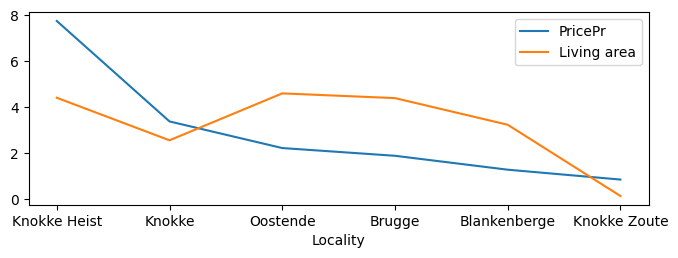

In [74]:
import matplotlib.pyplot as plt
lines = frame.plot.line(figsize=(8, 2.5))


display histogram of the same data in histogram

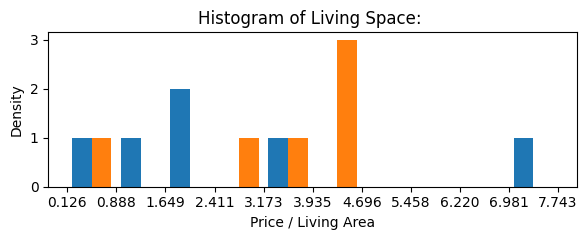

In [75]:
import matplotlib.ticker as mticker
fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 2.5))
n, bins, patches = plt.hist(frame)
plt.xticks(bins)
ax.set_xlabel('Price / Living Area')
ax.set_ylabel('Density')
ax.set_title(r'Histogram of Living Space: ')
fig.tight_layout()
plt.show()

more graphs on the previous subset of the data - a line chart and box chart

<AxesSubplot: >

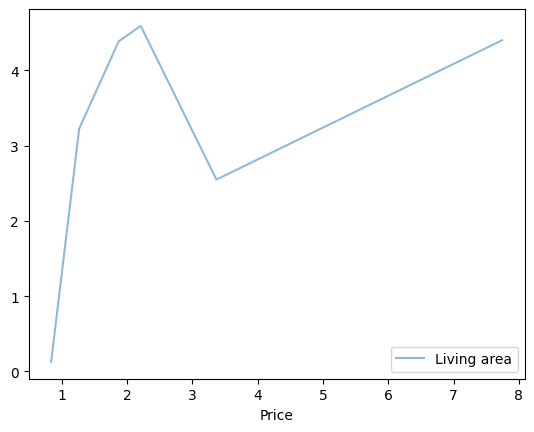

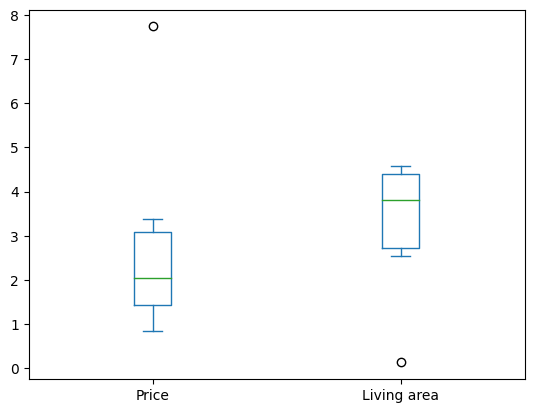

In [76]:
frame['PricePr']=frame['PricePr'].rename("Price")
frame.rename(columns={"PricePr": "Price"}, errors="raise", inplace=True)
frame.plot(x="Price", y="Living area", alpha=0.5)
frame.plot.box()